# Introduction to the Finite Element Method (FEM): Nodal and Modal Interpolations

####*Marco Lúcio Bittencourt* (mlb@fem.unicamp.br), *Cláudio Alessandro de Carvalho Silva* (cacs@thorus-scisoft.com.br) and *Alberto Costa Nogueira Junior* (albercn@br.ibm.com)

The basic concepts about the Finite Element Method presented in the previous class will now be generalized regarding interpolation functions (the very heart of FEM) and practical aspects of numerical integration.

## Normalized Local Coordinate Systems

In the FEM code presented in the previous class, the $0\leq x \leq L$ domain representing the bar length was discretized in a number of finite elements with the same length $h_e$. Off course, that was a simplification. In fact, the most common discretization involves elements of diferent sizes and - in higher geometric dimensions - different shapes. If all that had to be taken into account in the original problem domain, we would greatly reduce the flexibility of FEM for dealing with complicated domain geometries.

The basic technique employed to generalize the FEM is the use of normalized local coordinate systems to define the elements and perform most of the computations associated to each element (such as the computation of stiffness matrices and load vectors) instead of using the original global coordinate system in which the problem is defined. If suitable local/global mappings are defined, all operations can then be executed transparently.

The advantages of using normalized local coordinate systems are:
- Fixed integration limits for the computation of element matrices and load vectors.
- Simpler definition of polynomial interpolation functions.
- Use of distorted elements in FEM meshes.

The next figure shows the relationship between a normalized local coordinate system $-1\leq \xi_1 \leq 1$ and the subdomain $x_1 \leq x\leq x_2$ of a 1-D element of length $L$ defined in the global non-normalized system.
<table style="width:70%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![sistemas_locais](figs/sistemas_locais.png) <br><b>Normalized and non-normalized coordinate systems.</b> </td>		
  </tr>
</table>

Assuming a linear mapping for $x(\xi_1)$ such as
\begin{equation}
x(\xi_1) = a\xi_1+b
\end{equation}
the coefficients $a$ and $b$ are determined by
\begin{equation}
\left. \begin{array}{l} x(-1) = a(-1)+b=x_1 \\ x(1) = a(1)+b=x_2 \end{array}\right\}
\rightarrow \begin{array}{l}  a=\frac 12(x_2-x_1)=\frac L2 \\ b=\frac 12(x_1+x_2) \end{array}
\end{equation}
and the inverse mapping is 
\begin{equation}
\xi_1(x) = \frac{2x(\xi_1) - (x_1+x_2)}{x_2-x_1}
\end{equation}
*Natural coordinates* $L_1$ and $L_2$ ($0\leq L_i\leq 1$) can be also used to define a local coordinate system:
<table style="width:70%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![sist_coord_natural](figs/sist_coord_natural.png) <br><b>Natural coordinate system.</b> </td>		
  </tr>
</table>

\begin{equation}
l_1+l_2 = l \;\;\rightarrow\;\; \frac{l_1}{l}+\frac{l_2}{l} =1 \;\;\rightarrow\;\;
L_1+L_2=1
\end{equation}

The previous local coordinate systems are related as
\begin{equation}
\xi_1(L_1) = 2L_1-1 \qquad\qquad L_1(\xi_1) = \frac{1}{2}(1+\xi_1)
\end{equation}
<table style="width:70%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![natural_csi](figs/natural_csi.png) <br><b>Mappings between normalized systems.</b> </td>	
  </tr>
</table>

## 1-D Lagrange Polynomials

"For a given set of distinct points $x_j$ and numbers $y_j$, the *Lagrange polynomial* is the polynomial of the least degree that at each point $x_j$ assumes the corresponding value $y_j$, *i.e.* the functions coincide at each point." (*Wikipedia*)

The following expression defines a Lagrange polynomial $l_{p}^{(P_1)}(\xi_1)$ of order $P_1$ in the local system $\xi_1$:
\begin{equation}
l_{p}^{(P_1)}(\xi_1) =  \displaystyle\prod_{q=0(p\neq
q)}^{P_1}\frac{(\xi_1 -\xi_{1_q})} {(\xi_{1_p}-\xi_{1_q})}
\end{equation}

Lagrange polynomials of order $P_1$ can also be defined in direction $L_1$ of the natural coordinate system:
\begin{equation}
l_p^{(P_1)}(L_1) =  \prod_{q=0, p\neq q}^{P_1}\frac{(L_{1}-L_{1_q})}
{\displaystyle(L_{1_p}-L_{1_q})}
\end{equation}

When the Lagrange polynomials are used for interpolation in FEM, **one interpolation function is associated to each of the element's nodes.** Therefore, Lagrange polynomials of order $P_1$ are required for the interpolation on elements with $P_1+ 1$ nodes.
<table style="width:50%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![lagrange](figs/lagrange.png) <br><b>Mappings Nodes in the $\xi_1$ system.</b></td>		
  </tr>
</table>

The Python code below computes and plots 1-D Lagrange polynomials of fourth order. Most of the code is parametrized. You can easily compute and visualize polynomials of different orders.

In [1]:
import numpy as np  
import math #usefull functions: math.factorial(x), math.floor(), math.ceil()
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

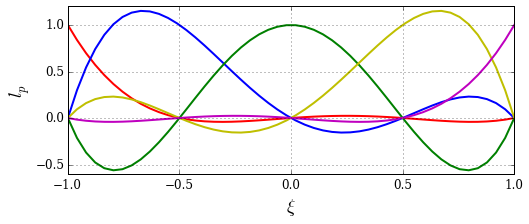

In [3]:
NNodes = 5        # Number of nodes
degree = NNodes-1 # Degree of 1-D nodal functions

# Coordinates of nodes in $\xi$ system 
xi_coords = np.linspace(-1.0, 1.0, NNodes)

# One term of a Lagrange polynomial
def l(xi, xi_p, xi_q):
    return (xi-xi_q)/(xi_p-xi_q)

# pth Lagrange polynomial of degree dg in the &\xi$ system
def lp(xi, p, dg):
    q = np.array(range(1,dg+1))
    for j in range(0, p):
        q[ j ] = j
    prod = 1.0
    for i in range(0,dg):
        prod = prod * l(xi,xi_coords[p],xi_coords[q[i]])
    return prod

# Array of values for plotting Lagrange polynomials of degree four
x   = np.linspace(-1.0, 1.0, 50)
pl  = np.array(range(0, NNodes)) 
lag = np.empty_like(pl, dtype=np.ndarray)

# Computes Lagrange polynomials for NNodes
for i in range(0, NNodes):
    lag[ i ] = lp( x, i, degree )

pyplot.figure(figsize=(8,3))
pyplot.grid(True)
pyplot.xlabel(r'$\xi$', fontsize=18)
pyplot.ylabel(r'$l_p$', fontsize=18)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.plot(x,lag[0], 'r-', lw=2, label='$l_0$')
pyplot.plot(x,lag[1], 'b-', lw=2, label='$l_1$')
pyplot.plot(x,lag[2], 'g-', lw=2, label='$l_2$')
pyplot.plot(x,lag[3], 'y-', lw=2, label='$l_3$')
pyplot.plot(x,lag[4], 'm-', lw=2, label='$l_4$')

In the figure above, note the **colocation property**: $l_{p}^{(P_1)}(\xi_{1_q}) =\delta_{pq}$, that is, each Lagrange function is a *Kronecker delta* relative to the nodes. Interpolation functions with the colocation property relative to the nodes of an element are called **nodal interpolation functions**. 

## 1-D Nodal Interpolation Functions

Using the concept of Lagrange polynomials, 1-D nodal interpolation functions for the finite element method can be defined either in the system $\xi_1$ or in the system $L_1$ as:

Local coordinate system $\xi_1$
\begin{equation}
N_p(\xi_1)=\phi_p(\xi_1)=\left\{
\begin{array}{lll}
 \frac{1}{2}(1-\xi_1)L_{p,P_1}^{(P_{1}-1)}(\xi_1) & p=0 \\
 \frac{1}{2}(1+\xi_1)L_{p,0}^{(P_{1}-1)}(\xi_1) & p=P_1 \\
 \frac{1}{4}(1-\xi_1)(1+\xi_1)L_p^{(P_{1}-2)}(\xi_1) & 0 < p < P_{1}
\end{array}\right.
\end{equation}

Local coordinate system $L_1$
\begin{equation}
 N_p(L_1)=\phi_p(L_1)=\left\{
\begin{array}{lll}
 (1-L_1)L_p^{(P_1-1)}(L_1) & p=0 \\
 L_1L_p^{(P_1-1)}(L_1) & p= P_1 \\
(1-L_1)L_1L_p^{(P_1-2)}(L_1) & 0 < p < P_1
\end{array}\right.
\end{equation}

where
\begin{equation}
L_{p,l}^{P_1-1}(\xi_{1}) = -\frac{\prod_{q=0,q\neq \{p,l\}}^{P_1}(\xi_{1} - {\xi_{1}}_{q})}{\prod_{q=0,q\neq \{p,l\}}^{P_1}({\xi_{1}}_{p} - {\xi_{1}}_{q})}\qquad\qquad
%
L_{p}^{P_1-2}(\xi_{1})=-4\frac{\prod_{q=1,q\neq p}^{P_1-1}(\xi_{1} - {\xi_{1}}_{q})}{\prod_{q=1,q\neq p}^{P_1-1}({\xi_{1}}_{p} - {\xi_{1}}_{q})}
\end{equation}

The stiffness and mass matrices for the bar in the local system $\xi_1$ are
\begin{equation}
[M_e] = \int_{-1}^{1} [N_e]^T[N_e]Ad\xi_1\qquad\qquad
[K_e] = \int_{-1}^{1} [B_e]^T[D][B_e]Ad\xi_1
\end{equation}

Those matrices have the following sparsity profiles for $P=4$:
<table style="width:50%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![Me_1D_lag_spy_P4](figs/Me_1D_lag_spy_P4.png) <br><b>Mass Matrix</b></td>
    <td style="text-align:center">![Me_1D_lag_spy_P4](figs/Me_1D_lag_spy_P4.png) <br><b>Stiffness Matrix</b></td>		
  </tr>
</table>

Note that both matrices are full. In fact, no orthoganilty property was required when defining the 1-D nodal interpolation funcions.

## Some comments on polynomial expasion approximation

In the previous class, it was shown that the FEM employs a polynomial expansion of compact support functions to approximate the solution of the weak formulation. The better the characteristics of that polynomial expansion, the better the approximation.

On way to increase the quality of the approximation is, while keeping the same local interpolation, to increase the number of elements (*h*-refinement). Students are invited to test this property in the FEM code provided previously. Another way is to increase the order of the terms in the polynomial expansion. As seen in the previous sections, one can use higher order **nodal** interpolation functions provided each element had the required number of nodes ($P_1$ order requires elements with $P_1+1$ nodes).

However, higher order functions can be **nodal** or **modal**. The nodal interpolation has the colocation property in such way that each function is one on one node and zero on the others. This leads to a direct physical interpretation of the interpolation coefficients. However, increasing the interpolation order demands increasing the number of physical nodes, which limits the aplicability of the method, specially on higher geometric dimensions.

**Modal** interpolations does not have colocation property and then there may be no physical interpretation of the interpolation coefficients. There is no requirement of increasing the number of nodes to increase the interpolation order. This allows greater flexibility of having different interpolation orders on the same mesh.

## 1-D Jacobi Polynomials

*Jacobi polynomials* belong to the class of orthogonal polynomials.

The *Jacobi polynomials* of order $p$ with weights $\alpha,\beta$ in the variable $-1\leq \xi_1\leq 1$ are denoted $P_p^{\alpha,\beta}(\xi_1)$. They satisfy the following **orthogonality condition** in the $\xi_1$-coordinate system
\begin{equation}
\int_{-1}^{1} (1-\xi_1)^\alpha (1+\xi_1)^\beta P_n^{\alpha,\beta}(\xi_1) P_m^{\alpha,\beta}(\xi_1)d\xi_1 = C\delta_{mn}
\end{equation}
or in the $L_1$-coordinate system
\begin{equation}
\int_{0}^{1} (1-L_1)^\alpha L_1^\beta P_n^{\alpha,\beta}(2L_1-1) P_m^{\alpha,\beta}(2L_1-1)dL_1 = D\delta_{mn}
\end{equation}

*Legendre* and *Chebyshev* polynomials are special cases of Jacobi polynomials according to specific values of weights:
- Legendre polynomials: $\alpha=\beta=0$
- Chebyshev polynomials: $\alpha=\beta=-\frac12$

Jacobi polynomials are generated by the following recurrence relation:
\begin{equation}\begin{array}{rll}
{P}_{0}^{\alpha, \beta}(\xi_{1}) &=& 1\\
{P}_{1}^{\alpha, \beta}(\xi_{1}) &=& \frac{1}{2}[\alpha-\beta+(\alpha+\beta+2)\xi_{1}]\\
a_{p}^{1}{P}_{p+1}^{\alpha,\beta}(\xi_{1})&=& (a_{p}^{2}+a_{p}^{3}\xi_{1}){P}_{p}^{\alpha, \beta}(\xi_{1})-a_{p}^{4}{P}_{p-1}^{\alpha, \beta}(\xi_{1})\\
a_{p}^{1}&=&2(p+1)(p+\alpha+\beta+1)(2p+\alpha+\beta)\\
a_{p}^{2}&=&(2p+\alpha+\beta+1)(\alpha^{2}-\beta^{2})\\
a_{p}^{3}&=&(2p+\alpha+\beta)(2p+\alpha+\beta+1)(2p+\alpha+\beta+2)\\
a_{p}^{4}&=&2(p+\alpha)(p+\beta)(2p+\alpha+\beta+2)
\end{array}
\end{equation}

That recurrence relation is implemented by the Python code below.

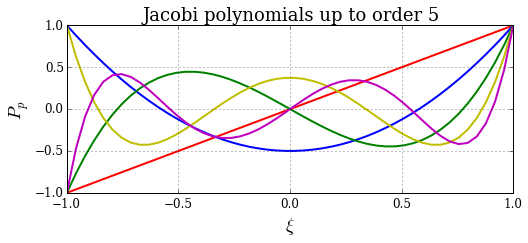

In [4]:
def JacobiP(r,m,alpha,beta):
# Pm, Pn -- mth-order Jacobi polynomial with weights alpha and beta evaluated at point r
# Pn0, Pn1, Pn2 -- Jacobi polynomials of order n-1, n and n+1
# a1n, a2n, a3n, a4n -- recursive coefficients to compute Jacobi polynomials
    
    #Jacobi polynomials evaluated at point r
    Pn0 = 1.
    Pn1 = 0.5*(alpha - beta + (alpha + beta + 2) * r);
    
    for n in range(1,m):
        a1n = 2.*(n+1)*(n + alpha + beta +1)*(2.*n + alpha + beta)
        a2n = (2.*n + alpha + beta + 1)*(alpha**2 - beta**2)
        a3n = (2.*n + alpha + beta)*(2.*n + alpha + beta + 1)*(2.*n + alpha + beta + 2)
        a4n = 2.*(n + alpha)*(n + beta)*(2.*n + alpha + beta + 2)
        
        Pn2 = (1./a1n)*((a2n + a3n * r)*Pn1 - a4n*Pn0)
        
        Pn0 = Pn1
        Pn1 = Pn2
    
    if m == 1:
        Pm = Pn1
    elif m > 1:
        Pm = Pn2
    else: 
        Pm = Pn0
    
    return Pm

# Data for visualization of polynomials
NOrders = 5     # number of polynomials of consecutive orders to be generated
o   = np.array(range(1, NOrders+1))               
jac = np.empty_like(o, dtype=np.ndarray)

for i in range(0, NOrders):
    jac[ i ] = JacobiP( x, o[i], 0, 0 ) # I am choosing Legendre for example

pyplot.figure(figsize=(8,3))
pyplot.grid(True)
pyplot.xlabel(r'$\xi$', fontsize=18)
pyplot.ylabel(r'$P_p$', fontsize=18)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.title('Jacobi polynomials up to order %d' % NOrders, fontsize=18)
pyplot.plot(x,jac[0], 'r-', lw=2, label='$P_0$')
pyplot.plot(x,jac[1], 'b-', lw=2, label='$P_1$')
pyplot.plot(x,jac[2], 'g-', lw=2, label='$P_2$')
pyplot.plot(x,jac[3], 'y-', lw=2, label='$P_3$')
pyplot.plot(x,jac[4], 'm-', lw=2, label='$P_4$')

## 1-D Modal Interpolation Functions

Using Jacobi polynomials, 1-D **modal** interpolation functions for the finite element method can be defined either in the system $\xi_1$ or in the system $L_1$ as:

Local coordinate system $\xi_1$
\begin{equation}
N_p(\xi_1)=\phi_p(\xi_1)=\left\{
\begin{array}{lll}
 \frac{1}{2}(1-\xi_1) & p=0 \\
 \frac{1}{2}(1+\xi_1) & p=P_1 \\
 \frac{1}{4}(1-\xi_1)(1+\xi_1)P_{p-1}^{\alpha_1, \beta_1}(\xi_1) & 0 < p
 < P_1
\end{array}\right.
\end{equation}

Local coordinate system $L_1$
\begin{equation}
N_p(L_1)=\phi_p(L_1)=\left\{
\begin{array}{lll}
 1-L_1 & p=0 \\
 L_1 & p=P_1 \\
(1-L_1)L_1P_{p-1}^{\alpha_1, \beta_1}(2L_1 - 1) & 0 < p
 < P_1
\end{array}\right.
\end{equation}

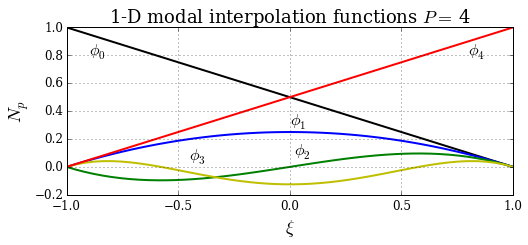

In [5]:
def NpModal(xi, p, P1, alpha, beta):
    """Returns the pth interpolation function of a P1th-order modal interpolation at xi.
    
    Parameters
    ----------
    xi   : -1 <= xi <= 1, point of evaluation.
    p    : index of the interpolation function 0 <= p <= P1
    P1   : highest degree of the modal interpolation functions
    alpha: weight of the Jacobi polynomials
    beta : weight of the Jacobi polynomials
        
    Returns
    -------
    Np : pth interpolation function of a P1th-order modal interpolation at xi.
    """
    if p == 0:
        return 0.5*(1-xi)  # N_0
    elif p == P1:
        return 0.5*(1+xi)  # N_P1
    elif p > 0 and p < P1:
        return 0.25*(1-xi)*(1+xi)*JacobiP( xi, p-1, alpha, beta )
    else:
        return 0

pOrder = 4           # highest degree of the modal interpolation functions
NFuncs = pOrder + 1  # number of interpolation functions N_0 to N_pOrder

# Data for visualization of polynomials
nf  = np.array(range(0, NFuncs))               
Npm = np.empty_like(nf, dtype=np.ndarray)

for i in range(0, NFuncs):
    Npm[ i ] = NpModal(x, i, pOrder, 0., 0.)

pyplot.figure(figsize=(8,3))
pyplot.grid(True)
pyplot.xlabel(r'$\xi$', fontsize=18)
pyplot.ylabel(r'$N_p$', fontsize=18)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.title('1-D modal interpolation functions $P=$ %d' % pOrder, fontsize=18)
pyplot.plot(x,Npm[0], 'k-', lw=2, label='$\phi_0$')
pyplot.plot(x,Npm[1], 'b-', lw=2, label='$\phi_1$')
pyplot.plot(x,Npm[2], 'g-', lw=2, label='$\phi_2$')
pyplot.plot(x,Npm[3], 'y-', lw=2, label='$\phi_3$')
pyplot.plot(x,Npm[4], 'r-', lw=2, label='$\phi_4$')
pyplot.text(-0.9, 0.8, r'$\phi_0$')
pyplot.text(0.0, 0.3, r'$\phi_1$')
pyplot.text(0.02, 0.085, r'$\phi_2$')
pyplot.text(-0.45, 0.05, r'$\phi_3$')
pyplot.text(0.8, 0.8, r'$\phi_4$')


Can you observe the those basis functions lead to a continuous interpolation of the global domain? In addition, is it possible to combine element of different interpolation orders?

The bar element mass and stiffness matrices for $P=6$ and $\alpha_1=\beta_1=1$ in the $\xi_1$ coordinate system have the following patterns:
<table style="width:50%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![Me_1D_jac_spy_P6](figs/Me_1D_jac_spy_P6.png) <br><b>Mass Matrix</b></td>
    <td style="text-align:center">![Ke_1D_jac_spy_P6](figs/Ke_1D_jac_spy_P6.png) <br><b>Stiffness Matrix</b></td>		
  </tr>
</table>

## Mapping

The bar element mass and stiffness matrices are given in the global and local coordinate systems as:
\begin{equation}
[M_e] = \int_{x_{i-1}}^{x_i} [N_e]^T[N_e]Adx = \int_{-1}^{1} [N_e]^T[N_e]A |J|d\xi_1
\end{equation}
\begin{equation}
[K_e] = \int_{x_{i-1}}^{x_i} [B_e]^T[D][B_e]Adx = \int_{-1}^{1} [B_e]^T[D][B_e]A |J|d\xi_1
\end{equation}

The Jacobian of the local-global mapping is given by
\begin{equation}
[J] = \frac{dx(\xi_1)}{d\xi_1}
\end{equation}

The $x$ coordinate can be interpolated in an isoparametric way using the same shape functions for the unknown and global coordinates of the nodes as
\begin{equation}
x(\xi_1) = \sum_{i=0}^n \phi_i(\xi_1)X_i
\end{equation}

Based on that, the Jacobian is given by
\begin{eqnarray*}
[J] &=& \frac{dx(\xi_1)}{d\xi_1} = \sum_{i=0}^n \frac{d\phi_i(\xi_1)}{d\xi_1} X_i \\
&=& \left[\begin{array}{cccc} \phi_{0,\xi_1} & \phi_{1,\xi_1} & \ldots & \phi_{n,\xi_1} \end{array} \right]
\left[\begin{array}{c} X_0 \\ X_1 \\ \vdots \\ X_n \end{array} \right]
\end{eqnarray*}

The global derivatives in the bar strain matrix $[B]=[\begin{array}{cc} \phi_1'(x) & \phi_2'(x)\end{array}]$ are calculated applying the chain rule:
\begin{equation}
\phi_i(x)=\phi_i(x(\xi_1))\;\;\rightarrow\;\;
\phi_{i,\xi_1} = \phi_{i,x}x,_{\xi_1}
\end{equation}
\begin{equation}
\phi_{i,x} = [J]^{-1}\phi_{i,\xi_1}
\end{equation}

## Numerical Integration

The coefficients of the element matrices are generally computed by numerical integration.

Let $u(\xi_1)$ be a polynomial function of order $(2Q-k)$, that is, $u(\xi_1)\in P_{2Q-k}([-1,1])$. The integration of the product of $u(\xi_1)$ by $(1-\xi_1)^\alpha(1+\xi_1)^\beta$ is
\begin{equation}
I = \int_{-1}^1 (1-\xi_1)^\alpha(1+\xi_1)^\beta u(\xi_1)d\xi_1
\end{equation}

The function $u(\xi_1)$ can be decomposed as
\begin{equation}
u(\xi_1) = \sum_{i=0}^{Q-1} u(\xi_{1,i})h_i(\xi_1) + s(\xi_1)r(\xi_1)
\end{equation}
assuming
- $h_i(\xi_j)=\delta_{ij}$ denotes the Lagrange polynomials associated to the
$Q$ nodal points $\xi_{1,i}$.
- $s(\xi_{1})$ is a polynomial of $Q$ with roots on the nodes $\xi_{i,1}$,
ou seja, $s(\xi_{1,i})=0$.
- $r(\xi_{1})$ is a polynomial expansion of the remainder with order $Q-k$.

Therefore,
\begin{equation}
I = \sum_{i=0}^{Q-1} w_i^{\alpha,\beta}u(\xi_{1,i})+R(u)
\end{equation}
\begin{equation}
w_i^{\alpha,\beta} = \int_{-1}^1 (1-\xi_1)^\alpha(1+\xi_1)^\beta h_i(\xi_1)d\xi_1
\end{equation}
\begin{equation}
R(u) = \int_{-1}^1 (1-\xi_1)^\alpha(1+\xi_1)^\beta s(\xi_{1})r(\xi_{1})d\xi_1
\end{equation}

We are looking for a function $s(\xi_1)$ such as the remainder $R(u)$ is null, implying an exact integration.

For $s(\xi_1) = P_{Q}^{\alpha, \beta}(\xi_1)$ and $k=1$
\begin{equation}
R(u) = \int_{-1}^1 (1-\xi_1)^\alpha (1+\xi_1)^\beta P_{Q}^{\alpha, \beta}(\xi_1)r(\xi_1)d\xi_1 = 0
\end{equation}
because $r(\xi_1)$ has order $Q-1$ and $s(\xi_1)$ has order $Q$.

That choice defines the **Gauss-Jacobi quadrature**. $\xi_{1,i}$ are the roots of $P_{Q}^{\alpha, \beta}(\xi_1)$ determined by a Newton-Raphson procedure. In some cases, it is useful to use $\xi_1=\pm 1$ as nodal points which defines the **Gauss-Radau** and **Gauss-Lobatto quadratures**.

The Gauss, Gauss-Radau and Gauss-Lobatto quadratures exactly integrate the polinomial functions of $2Q-1$, $2Q-2$ e $2Q-3$, respectively.
![distrib_pontos](figs/distrib_pontos.png)

Number of points required to exactly integrate a function of order $P$:
- Gauss-Legendre (GL): $2Q-1=P\rightarrow Q=\frac12 (P+1)$
- Gauss-Radau (GR): $2Q-2=P\rightarrow Q=\frac12 (P+2)$
- Gauss-Lobatto-Legendre (GLL): $2Q-3=P\rightarrow Q=\frac12 (P+3)$

## Numerical Integration Example

\begin{equation}
f(\xi_1) = 1-\xi_1^2 = (1-\xi_1)(1+\xi_1), \;\;\xi_1\in[-1,1]
\end{equation}
\begin{equation}
I=\int_{-1}^{1}f(\xi_1)d\xi_1=\frac 43
\end{equation}

<table border="0" style="width:30%">
  <col align="left">
  <col align="right">
  <col align="right">
  <tr> <td>Quadratura </td> <td style="text-align:right; width:30px">Coordinates </td> <td style="text-align:right; width:30px">Weights </td> </tr>
  <tr> <td>GL$(\alpha=\beta=0)$ </td> <td style="text-align:right">-0,5774<br>0,5774</td> <td style="text-align:right">1<br>1</td></tr>
  <tr> <td>GLL($\alpha=\beta=0)$ </td><td style="text-align:right">-1,0000<br>0,0000<br>1,0000</td> <td style="text-align:right">1/3<br>4/3<br>1/3</td></tr>
  <tr> <td>GR$(\alpha=\beta=0)$ </td><td style="text-align:right">-1,0000<br>0,3333</td> <td style="text-align:right">1/2<br>3/2</td></tr>
  <tr> <td>GJ$(\alpha=1,\beta=1)$</td><td style="text-align:right">0,0000</td> <td style="text-align:right">4/3</td> </tr>
</table>

The Gauss-Legendre and Gauss-Lobatto-Legendre quadratures are implemented by the Python code below.

In [5]:
#First derivative of Jacobi polynomials
def DJacobiP(r,m,alpha,beta):
# DPm, DPn1 -- Derivative of the mth-order Jacobi polynomial at point r
# Pn0, Pn1, Pn2 -- Jacobi polynomials of order n-1, n and n+1
# a1n, a2n, a3n, a4n -- recursive coefficients to compute Jacobi polynomials
# b1n, b2n, b3n -- recursive coefficients to compute first derivatives of Jacobi polynomials

    # Derivative of the Jacobi polynomial of order m evaluated at point r
    DPm = 0.
    Pn0 = 1.
    Pn1 = 0.5*(alpha - beta + (alpha + beta + 2) * r)
    Pn2 = 0.
    
    for n in range(1,m+1):
        a1n = 2.*(n+1)*(n + alpha + beta +1)*(2.*n + alpha + beta)
        a2n = (2.*n + alpha + beta + 1)*(alpha**2 - beta**2)
        a3n = (2.*n + alpha + beta)*(2.*n + alpha + beta + 1)*(2.*n + alpha + beta + 2)
        a4n = 2.*(n + alpha)*(n + beta)*(2.*n + alpha + beta + 2)
   
        Pn2 = (1./a1n)*((a2n + a3n * r)*Pn1 - a4n*Pn0)
        
        if r == -1.:
            DPn1 = (-1.0)**(m-1)*0.5*(alpha+beta+m+1)*math.factorial(m+beta)/(math.factorial(beta+1.)*math.factorial(m-1))
        elif r == 1.:
            DPn1 = 0.5*(alpha+beta+m+1.)*math.factorial(m+alpha)/(math.factorial(alpha+1)*math.factorial(m-1))
        else:
            b1n = (2.*n + alpha + beta)*(1 - r**2)
            b2n = (n)*(alpha - beta - (2.*n + alpha + beta) * r)
            b3n = 2.*(n + alpha)*(n + beta)

            DPn1 = (1./b1n)*(b2n*Pn1 + b3n*Pn0)
           
        Pn0 = Pn1
        Pn1 = Pn2

        DPm = DPn1
        
    return DPm

#Newton-Raphson algorithm with polynomial deflation to compute polynomial roots
def JacobiRoots(alpha,beta,m):
    
    #Allocates vector for quadrature points
    x = np.zeros(m)
    #Stop criterium for Newton-Raphson algorithm
    epsilon = 1.e-16
   
    #Newton-Raphson algorithm with polynomial deflation
    for k in range(0,m):
        #Initial guess: roots of the mth-order Chebyshev polynomial
        r = -np.cos(np.pi * (2.*k + 1)/(2.*m))
        if k > 0:
            r = (r + x[k-1])/2.
            
        delta = 1.
        while abs(delta) > epsilon:
            s = 0.
            for i in range(0,k):
                s = s + 1./(r - x[i])
                
            Pm = JacobiP(r,m,alpha,beta)
            DPm = DJacobiP(r,m,alpha,beta)
            delta = -Pm/(DPm - Pm * s)
            r = r + delta
            
        x[k] = r
        
    return x

#Quadrature weights
def JacobiGaussWeights(x,alpha,beta,m):
    
    #Allocates vector for quadrature weights
    w = np.zeros(m)
    
    if quad_pts == 'GL':
        #case'GL'
        c = 2.**(alpha + beta + 1)

        g1 = alpha + m + 1
        g2 = beta + m + 1
        g3 = alpha + beta + m + 1

        #Computes factorials g1, g2, g3 e M (WARNING: For n integer Gamma[n] = (n-1)!)
        gama1 = math.factorial(g1-1)
        gama2 = math.factorial(g2-1)
        gama3 = math.factorial(g3-1)
        M = math.factorial(m)

        #Computes quadrature weights
        C1 = c*gama1*gama2
        for i in range (0,m):
            r = x[i]
            DPm = DJacobiP(r,m,alpha,beta)
            C2 = M*gama3*(1-r**2)
            w[i] = (C1/C2)*(DPm**(-2))

    elif quad_pts == 'GLL':
        #case 'GLL'
        c = 2.**(alpha + beta + 1)

        g1 = alpha + m
        g2 = beta + m
        g3 = alpha + beta + m + 1

        #Computes factorials g1, g2, g3 e M (WARNING: For n integer Gamma[n] = (n-1)!)
        gama1 = math.factorial(g1-1)
        gama2 = math.factorial(g2-1)
        gama3 = math.factorial(g3-1)
        M = math.factorial(m-1)

        #Computes quadrature weights
        C1 = c*gama1*gama2
        C2 = (m - 1.)*M*gama3
        C3 = beta + 1.
        C4 = alpha + 1.

        r = x[0]
        Pm = JacobiP(r,m-1,alpha,beta)
        w[0] = C3*(C1/C2)*(Pm**(-2))

        r = x[m-1]
        Pm = JacobiP(r,m-1,alpha,beta)
        w[m-1] = C4*(C1/C2)*(Pm**(-2))

        for i in range (1,(m-1)):
            r = x[i]
            Pm = JacobiP(r,m-1,alpha,beta)
            w[i] = (C1/C2)*(Pm**(-2))
            
    else:
        print('Invalid integration type!')
        
    return w

#Quadrature points and weights
def JacobiGaussQuad(N):
    
    #Gets number of quadrature points based on the order of the polynomial approximation
    if quad_pts == 'GL':
        n_GL = (N+1.)/2.
        n = math.ceil(n_GL)
        
    elif quad_pts == 'GLL': 
        n_GLL = (N+3.)/2.
        n = math.ceil(n_GLL) #math.floor(n_GLL) keeps the nodal spectral approach n = N+1
        
    else:
        print('Invalid integration type!')
        
    n=int(n) #JacobiRoots and JacobiGaussWeights dont accept n as float!
    
    #Sets parameters to obtain quadrature points from Legendre polynomials
    #Legendre == Jacobi(alpha,beta) with alpha == 0 and beta == 0
    alpha = 0
    beta = 0
    
    #Sobroutines that evaluates the quadrature points and weights using modified 
    #Newton-Raphson algorithm with polynomial deflation
    if quad_pts == 'GL':
        xi = JacobiRoots(alpha,beta,n)
        wi = JacobiGaussWeights(xi,alpha,beta,n)
        
    elif quad_pts == 'GLL':
        #Allocating vector for quadrature points
        xi = np.zeros(n)
        x = JacobiRoots(alpha+1,beta+1,n-2)
        xi[1:-1] = x.copy()
        xi[0] = -1.0
        xi[n-1] = 1.0
        wi = JacobiGaussWeights(xi,alpha,beta,n)
        
    else:
        print('Invalid integration type!')
    
    return xi, wi

# Quadrature points and weights
N = 2 # polynomial order

quad_pts = 'GL' # Gauss-Legendre
(xi,wi) = JacobiGaussQuad(N)
nip = len(xi)

print('Gauss-Legendre (GL)')
print('Coordinates |   Weights')
for i in range(0,nip):
    print('{:10.5f}  |{:10.5f}'.format(xi[i], wi[i]))
    
# Function to be integrated
fi = 1-xi**2
# Numerical integration
I  = np.dot(wi, fi)
print('Integral (GL)  = {:10.5f}'.format( I ))

quad_pts = 'GLL' # Gauss-Legendre-Lobatto
(xi,wi) = JacobiGaussQuad(N)
nip = len(xi)

print('')
print('Gauss-Legendre-Lobatto (GLL)')
print('Coordinates |   Weights')
for i in range(0,nip):
    print('{:10.5f}  |{:10.5f}'.format(xi[i], wi[i]))

# Function to be integrated
fi = 1-xi**2
# Numerical integration
I  = np.dot(wi, fi)
print('Integral (GLL) = {:10.5f}'.format( I ))

Gauss-Legendre (GL)
Coordinates |   Weights
  -0.57735  |   1.00000
   0.57735  |   1.00000
Integral (GL)  =    1.33333

Gauss-Legendre-Lobatto (GLL)
Coordinates |   Weights
  -1.00000  |   0.33333
   0.00000  |   1.33333
   1.00000  |   0.33333
Integral (GLL) =    1.33333


## Assignment

1. Implement a Python code using the 1-D modal interpolation functions and numeric quadrature to compute the local stiffness matrix of a bar element in the local coordinate system $\xi_1$.
2. Extend the code implemented in the previous item to compute the same stiffness matrix but in the global coordinate system. Hint: you need to choose a local-to-global mapping.
3. Extend the code presented in the previous class to solve a bar subjected to the same constant load $q(x)=q_0$ and the same boundary conditions using the 1-D modal interpolation.
4. Increase the polynomial order and check the convergence error.
5. Solve the bar problem again, now considering $q(x)=q_0\sin(\pi x/2)$. Plot the approximate error for the $h$ and $p$-refinements in terms of the number of degrees of freedom in logarithmic scale. Calculate the rates of convergence.

## References

- G. E. Karniadakis, S. J. Sherwin. *Spectral/hp Element Methods for CFD*. Oxford University
Press, Oxford, 2nd edition, 2005.
- M.L. Bittencourt. *Fully tensorial nodal and modal shape functions for triangles and tetrahedra*. IJNME, 63(2):1530-1558, 2005.
- M.L. Bittencourt, M. G. Vazquez, T. G. Vazquez. *Construction of shape functions for the h- and p- versions of the fem using tensorial product*. IJNME, 71(5):529-563, 2007.
- S. Dong, Z. Yosibash. *A parallel spectral element method for dynamic three-dimensional nonlinear
elasticity problems*. Computer & Structures, (4):61-85, 2008.
- M.L. Bittencourt, T. G. Vazquez. *Tensor-based gauss-jacobi numerical integration for high-order
mass and stiffness matrices.* IJNME, 79(5):599-638,2009.
- M.L. Bittencourt, *Computational Solid Mechanics: Variational Formulation and High Order Approximation*, CRC Press, 2014.